# Bayesian Linear Regression

https://en.wikipedia.org/wiki/Bayesian_linear_regression

Bayesian linear regression is an approach to 
1. Linear regression
2. Based on Bayesian inference

    a) A Priori distribution function (Normal distribution or binomial)
    
    b) Maximum likelihood 
    
    c) A Posteriori result

# Scikit-Learn: Bayesian Linear Regression

https://scikit-learn.org/stable/modules/linear_model.html
    
Bayesian Linear Regression includes "A priori" Probability, "A Posteriori" Probability, and Linear Regression with Regularization.

The $l_{2}$ regularization used in Ridge regression and classification is equivalent to finding a maximum a posteriori estimation under a Gaussian prior over the coefficients $ w $ with precision $ \lambda^{-1} $. 

The output $y$ is assumed to be Gaussian distributed around $Xw$:

The Continuous Probability statement, $ p(y|X, w, \alpha)$, can be expressed into Discrete Formula, $ \mathcal{N}(y|Xw,\alpha)$ as below:
    
$$ p(y|X, w, \alpha) = \mathcal{N}(y|Xw,\alpha)$$

where $\alpha $ is a random variable to be estimated from the measurement data.

The advantages of Bayesian Regression are:

- It can predict the data with statistical model, such as, mean, standard error, variance, p-value, and etc.
- It include regularization parameters for K-fold cross-validation.
- It has loss function for optimization.

The disadvantages of Bayesian regression include:
- Inference of the mean, standard deviation of statistical model can be time consuming.
- The statistical model has some limitation, such as, Gaussian, exponential function, Binomial, and etc.

# Bayesian Ridge Linear Regression

BayesianRidge combines Bayesian ("A Priori" and "A Posterio" probabilistic model) and Ridge Linear Regression. 

We have the Bayesian Linear Regression defined as below:

$$ p(y|X, w, \alpha) = \mathcal{N}(y|Xw,\alpha)$$

We want to find the weight $w$.

The "a priori" for the coefficient $w$ is given by a spherical Gaussian:

$$ p(w|\lambda) =
\mathcal{N}(w|0,\lambda^{-1}\mathbf{I}_{p})$$


The "a priori" for $ \alpha $ and $ \lambda $ are hyperparameters and chosen to be gamma distributions.

The Gamma Distribution uses maximum entropy probability for maximum likelihood prediction. 

The resulting model is called Bayesian Ridge Linear Regression and Ridge Classifier.

There are four more hyperparameters, $\alpha_{1}$, $\alpha_{2}$, $ \lambda_{1}$, and $ \lambda_{2} $
 of the gamma "a prior" distributions over  $\alpha$ and $ \lambda$. 

These are usually chosen to be non-informative. 

By default $\alpha_{1}$ = $\alpha_{2}$ = $\lambda_{1}$ = $\lambda_{2}$ = $10 ^{-6}$.

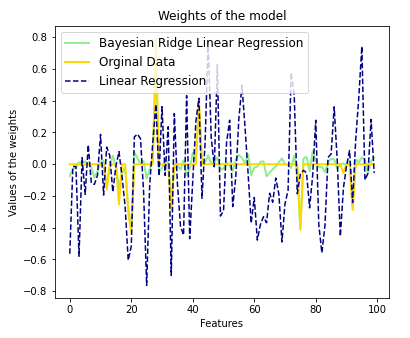

## Note: What are Hyperparameters? 

https://towardsdatascience.com/understanding-hyperparameters-and-its-optimisation-techniques-f0debba07568#:~:text=What%20are%20Hyperparameters%3F,Model%20parameters%20vs%20Hyperparameters
    
In statistics, Machine Learning, and Tensorflow, a hyperparameter is a parameter from "a prior" distribution.

The hyperparameter captures the prior belief before data is observed. 

In any machine learning algorithm, these parameters need to be initialized before training a model. 

## Model parameters vs Hyperparameters

Model parameters are the properties of training data that will learn on its own during training by the classifier or other ML model. 

For example,

- Weights and Biases
- Split points in Decision Tree.

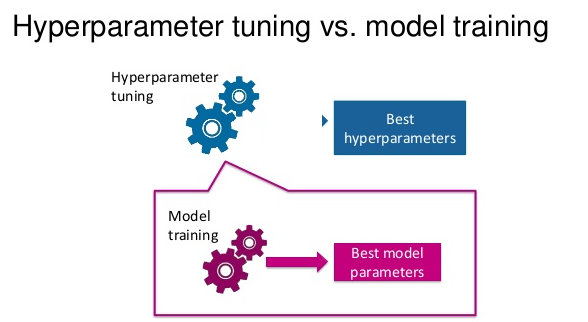

Model Hyperparameters are the properties that govern the entire training process. The below are the variables usually configure before training a model.

- Learning Rate
- Number of Epochs
- Hidden Layers
- Hidden Units
- Activations Functions

## Bayesian Ridge Regression is used for regression:
https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression

In [55]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
print('reg.fit(X, Y):')
print(reg.fit(X, Y))
print()
#BayesianRidge()
print('reg.predict([[1, 0.]]):')
print(reg.predict([[1, 0.]]))
print()
#array([0.50000013])
print('reg.coef_:')
print(reg.coef_)
#array([0.49999993, 0.49999993])

reg.fit(X, Y):
BayesianRidge()

reg.predict([[1, 0.]]):
[0.50000013]

reg.coef_:
[0.49999993 0.49999993]


# Example of Bayesian Ridge Regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

Computes a Bayesian Ridge Regression on a synthetic dataset.

See Bayesian Ridge Regression for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the estimated weights is Gaussian.

The estimation of the model is done by iteratively maximizing the marginal log-likelihood of the observations.

We also plot predictions and uncertainties for Bayesian Ridge Regression for one dimensional regression using polynomial feature expansion. Note the uncertainty starts going up on the right side of the plot. This is because these test samples are outside of the range of the training samples.

[s[:5] for s in X[:2]]:
[array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799]), array([ 1.8831507 , -1.34775906, -1.270485  ,  0.96939671, -1.17312341])]

relevant_features.shape: (10,)
noise.shape: (100,)

X.shape: (100, 100)
w.shape: (100,)
y.shape: (100,)



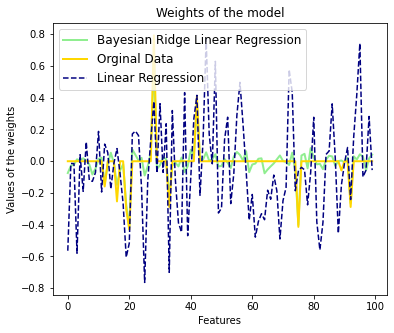

n_features:
100

relevant_features:
[12 16 20 33 75 28 89 19 92 42]

clf.coef_[relevant_features]:
[-0.14400941 -0.14891118 -0.41420293 -0.22763183 -0.40163703  0.63926529
  0.00467313 -0.27290326 -0.26406846  0.36618131]

np.full(len(relevant_features), 5.):
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]



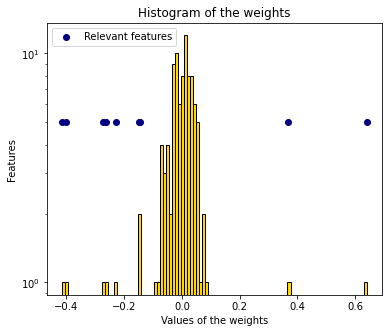

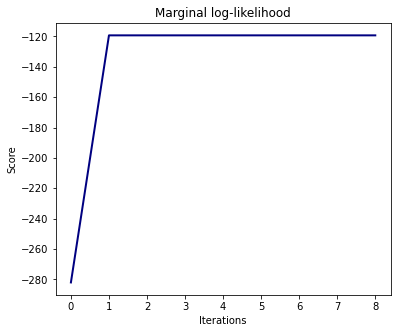

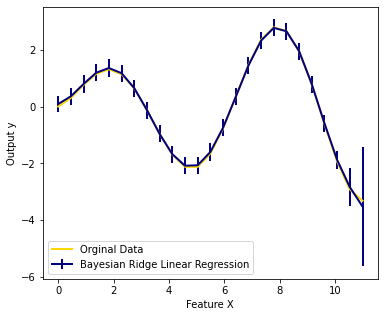

In [21]:
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
# create n_samples x n_features arary
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
print('[s[:5] for s in X[:2]]:')
print([s[:5] for s in X[:2]])
print()
# [s[:5] for s in X[:2]]:
# [array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799]), 
# array([ 1.8831507 , -1.34775906, -1.270485  ,  0.96939671, -1.17312341])]

# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 points for reference only. 
# Feature Data value between 0-100: 
# Generate random features for histogram comparison/plot only.
relevant_features = np.random.randint(0, n_features, 10)  # low-value, high-vale, size
print ('relevant_features.shape:', relevant_features.shape)
# print()
#print ('relevant_features:')
#print (relevant_features)
#print()
# Feature data between 0 to 100. 
# Total 10 points for reference only.
# [12 16 20 33 75 28 89 19 92 42]

# Intialized the weight matrix.
# w is the orginal data for comparison.
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
print ("noise.shape:", noise.shape)
print()
#print ("noise:", noise)
#print()
# noise: [-0.06904895 -0.01793308  0.00984857 -0.07750543 -0.04791028  0.08247469 ...
# Create the target

# Calculate the target value with give weight matrix.
y = np.dot(X, w) + noise
print ("X.shape:", X.shape)
# (100, 100)
print ("w.shape:", w.shape)
# w.shape: (100,)
print ("y.shape:", y.shape)
print()
# w.shape: (100,)

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison

# Bayesian Ridge Regression
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

# Linear Regression
ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")

# plot clf (Baysian Ridge Regression): Light green
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge Linear Regression")

# PLot the orginal data: Yellow
plt.plot(w, color='gold', linewidth=lw, label="Orginal Data")

# Plot Linear Regression: Navy blue.
plt.plot(ols.coef_, color='navy', linestyle='--', label="Linear Regression")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.show()

# Plot histgram for coefficient and relavant feature coefficient.
plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
# Plot weight (coefficient) vs.histogram
# x-axis with coefficent matrix. plt.hist (x, bin=size): plot histgram with bin size = 100
# Each bin scale = w/100 
print('n_features:')
print(n_features)
print()
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
print ('relevant_features:')
print (relevant_features)
print()
# [12 16 20 33 75 28 89 19 92 42]
print('clf.coef_[relevant_features]:')
print(clf.coef_[relevant_features])
print()
print('np.full(len(relevant_features), 5.):')
print(np.full(len(relevant_features), 5.))
print()
# [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
# scatter (x, y, ): plot value 5 for reference.
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")
plt.show()

# Plot score (More loop has higher score)
plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
# BayesianRidge.score_
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html
# score_: log marginal likelihood (to be maximized) at each iteration of the optimization. 
# Plot the likelihood.
# 
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

# Plotting some predictions for polynomial regression
# Plot error
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise

plt.show()

degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
# PLot Bayesian Ridge Regression wir error bar.
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Bayesian Ridge Linear Regression", linewidth=lw)

# Plot the orginal data
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Orginal Data")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

# Curve Fitting with Bayesian Linear Regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html#sphx-glr-auto-examples-linear-model-plot-bayesian-ridge-curvefit-py
    
Computes a Bayesian Ridge Regression of Sinusoids.

In general, when fitting a curve with a polynomial by Bayesian ridge regression, the selection of initial values of the regularization parameters (alpha, lambda) may be important. 

The regularization parameters are determined by an iterative procedure that depends on initial values.

# Sinusoidal Curve Fitting with Bayesian Linear Regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html#sphx-glr-auto-examples-linear-model-plot-bayesian-ridge-curvefit-py
    
In this example, the sinusoid is approximated by a polynomial using different pairs of initial values.

When starting from the default values (alpha_init = 1.90, lambda_init = 1.), the bias of the resulting curve is large, and the variance is small. So, lambda_init should be relatively small (1.e-3) so as to reduce the bias.

Also, by evaluating log marginal likelihood (L) of these models, we can determine which one is better. 

It can be concluded that the model with larger L is more likely.

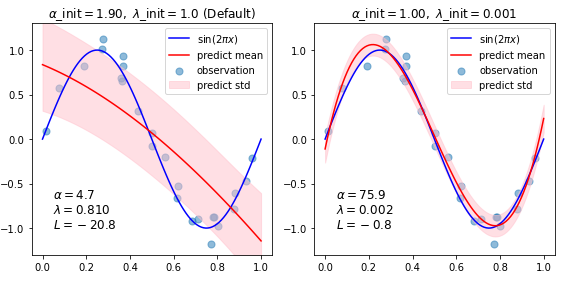

x_train[:5]:
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]

X_train[:3]:
[[1.         0.19151945 0.0366797  0.00702488]
 [1.         0.62210877 0.38701932 0.24076812]
 [1.         0.43772774 0.19160557 0.08387107]]

i: 0
ymean[:3]: [0.83622239 0.82579153 0.81513788]
ystd[:3]: [0.5183706  0.51592418 0.51357735]
reg.alpha_: 4.663435843530642
reg.lambda_: 0.8096061518612784
reg.scores_[-1]: -20.772678341335446

i: 1
ymean[:3]: [-0.11091034  0.00511525  0.11421081]
ystd[:3]: [0.15317891 0.14896164 0.14518649]
reg.alpha_: 75.85161053256685
reg.lambda_: 0.0021230207394917835
reg.scores_[-1]: -0.7805758936405625



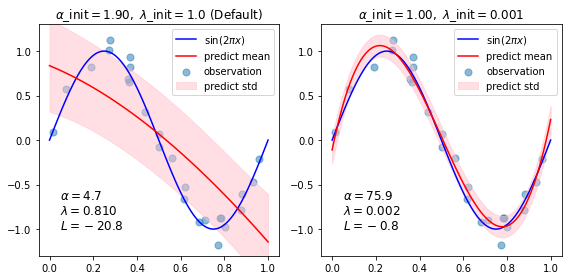

In [42]:
# print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

def func(x): return np.sin(2*np.pi*x)

# #############################################################################
# Generate sinusoidal data with noise
size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(0., 1., size)
# y_train = sin(x) + normal noise.
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0., 1., 100)

print('x_train[:5]:')
print(x_train[:5])
print()
# [0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]

# #############################################################################
# Fit by cubic polynomial
n_order = 3
# Generate a Vandermonde matrix.
# https://numpy.org/doc/stable/reference/generated/numpy.vander.html
#
# The columns of the output matrix are powers of the input vector.
# increasing=true => Increase
#
# x = np.array([1, 2, 3, 5])
#np.vander(x)
#array([[  1,   1,   1,   1],
#       [  8,   4,   2,   1],
#       [ 27,   9,   3,   1],
#       [125,  25,   5,   1]])
#np.vander(x, increasing=True)
#array([[  1,   1,   1,   1],
#       [  1,   2,   4,   8],
#       [  1,   3,   9,  27],
#       [  1,   5,  25, 125]])

X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

print('X_train[:3]:')
print(X_train[:3])
print()
#
# [[1.         0.19151945 0.0366797  0.00702488]
#  [1.         0.62210877 0.38701932 0.24076812

# #############################################################################
# Plot the true and predicted curves with log marginal likelihood (L)

# Bayesian Ridge Linear Regression ()
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html
# 
# BayesianRedge initialize alpha_1, 2 and lambda_1, 2
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i, ax in enumerate(axes):
    # print('i, ax:', i, ax)
    # i, ax: 0 AxesSubplot(0.125,0.125;0.352273x0.755)
    # i, ax: 1 AxesSubplot(0.547727,0.125;0.352273x0.755)
    
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        # set alpha = 1.90, lamda = 1.0
        init = [1 / np.var(y_train), 1.]  # Default values
        #print('i, y_train[:5]', i, y_train[:5])
        #print('variance:', np.var(y_train))
        #print('init:', init)
        # i, y_train[:5] 0 [ 0.82059829 -0.52825814  0.3153169  -0.8713142  -0.87699823]
        # variance: 0.5271007684998684
        # init: [1.8971704458826826, 1.0]
    elif i == 1:
        init = [1., 1e-3]
        # Set alpha = 1, lambda = 1e-3.
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)
    print('i:', i)
    print('ymean[:3]:', ymean[:3])
    print('ystd[:3]:', ystd[:3])
    
    # Plot blue func(x_test) and scatter y_train obsevation
    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    # Plot mean pink zone.
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(x_test, ymean-ystd, ymean+ystd,
                    color="pink", alpha=0.5, label="predict std")
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(
            init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    print('reg.alpha_:', reg.alpha_)
    print('reg.lambda_:', reg.lambda_)
    print('reg.scores_[-1]:', reg.scores_[-1])
    print()
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
           reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()